In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive


/content/drive/MyDrive


# **Extacting Folders from Google Drive To Colab Sample Data Folder**

In [3]:
import zipfile
import os

# Path to the zip file I uploaded on Google Drive
zip_file_path = '/content/drive/MyDrive/Training.zip'

# Directory whereI to extracted the contents
extracted_folder = '/content/sample_data'


os.makedirs(extracted_folder, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print("Extraction complete.")



Extraction complete.


In [23]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

#**Path of Folder Where Male And Female Sub Folder Are Present**

In [1]:
dir = '/content/sample_data/123'

In [20]:
Genders = os.listdir(dir) #class names

# **Count Plot Of Each Class**

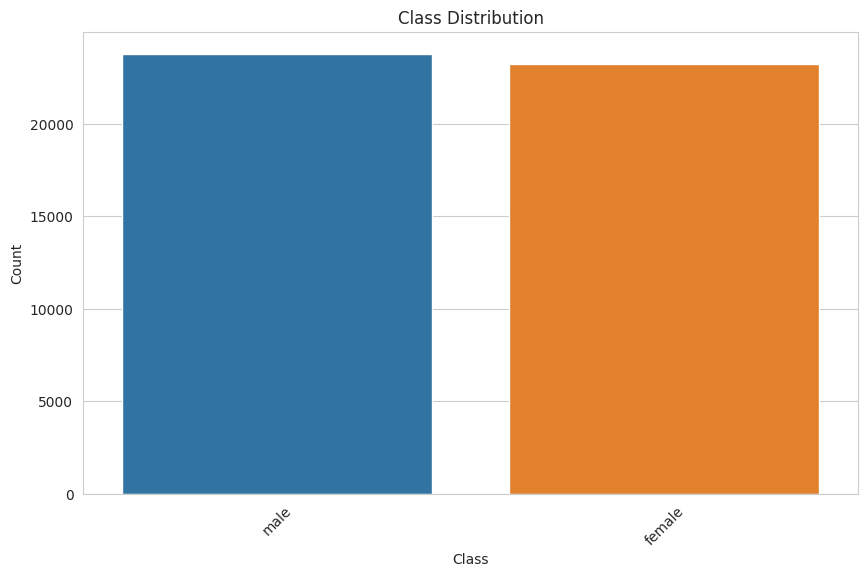

In [21]:
class_counts = [len(os.listdir(os.path.join(dir, Gender))) for Gender in Genders] #Used List Comprehension

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=Genders, y=class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()


# **Displaying Sample Images**

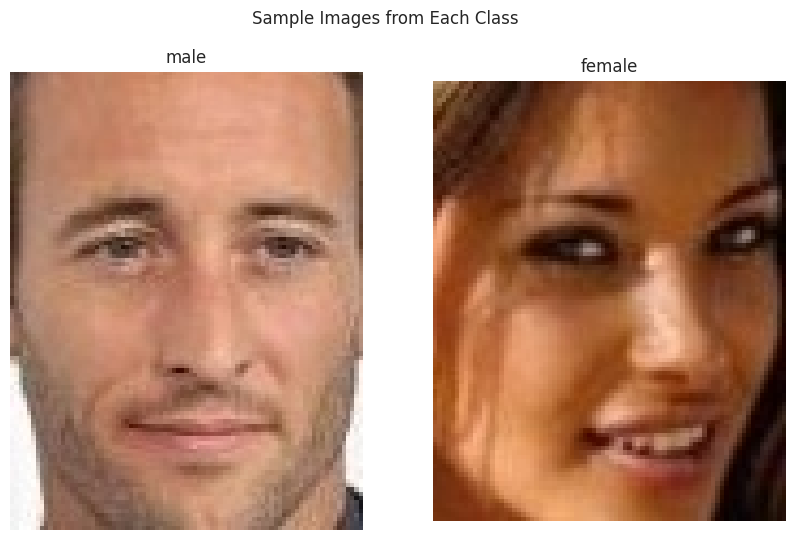

In [29]:
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(Genders):
    class_path = os.path.join(dir, class_name)
    random_image = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, random_image)
    image = Image.open(image_path)

    plt.subplot(1, len(Genders), i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')
plt.suptitle('Sample Images from Each Class')
plt.show()

# **Missing Values**

In [27]:
import os
total_images = sum([len(os.listdir(os.path.join(dir, Gender))) for Gender in Genders])
expected_images_per_class = total_images / len(Genders)

In [28]:
# Check for missing values
missing_values = []
for Gender in Genders:
    class_path = os.path.join(dir, class_name)
    num_images = len(os.listdir(class_path))
    missing_images = expected_images_per_class - num_images
    missing_values.append({'Class': class_name, 'Missing': missing_images})


print("Missing Values:")
for entry in missing_values:
    print(f"Class: {entry['Class']}, Missing: {entry['Missing']}")

Missing Values:
Class: female, Missing: 261.5
Class: female, Missing: 261.5


# **SVM (Linear SVC)**

#**Import Necessary Libraries**

In [12]:
import os
import numpy as np
import tensorflow as tf
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#**Define Constants**

In [4]:
img_width, img_height =32,32
batch_size = 16
epochs = 8

#**Data PreProcessing And Augmentation**

In [5]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Load and preprocess all images
all_data_generator = datagen.flow_from_directory(
    dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Split data into training and testing sets
X_all = np.concatenate([all_data_generator.next()[0] for _ in range(len(all_data_generator))])
y_all = all_data_generator.classes
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Load a pre-trained CNN model for feature extraction
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_width, img_height, 3)
)

Found 47009 images belonging to 2 classes.


In [6]:
# Extract features using the base model
features_train = base_model.predict(X_train, verbose=1)
features_test = base_model.predict(X_test, verbose=1)

294/294 [==============================] - 2s 7ms/step


In [7]:
# Flatten the features
flattened_features_train = features_train.reshape(features_train.shape[0], -1)
flattened_features_test = features_test.reshape(features_test.shape[0], -1)

In [8]:
# Train a Linear SVM model
svm_model = LinearSVC()
svm_model.fit(flattened_features_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [9]:
# Make predictions using the SVM model
predictions_train = svm_model.predict(flattened_features_train)
predictions_test = svm_model.predict(flattened_features_test)

In [10]:
# Calculate accuracy
accuracy_train = accuracy_score(y_train, predictions_train)
accuracy_test = accuracy_score(y_test, predictions_test)
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Test Accuracy: {accuracy_test:.2f}')

Training Accuracy: 0.78
Test Accuracy: 0.78


# **CNN**

In [14]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam


# **Data preprocessing**

In [15]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Load and preprocess all images
all_data_generator = datagen.flow_from_directory(
    dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 47009 images belonging to 2 classes.


# **Split In To Training And Test Sets**

In [16]:
# Split data into training and testing sets
X_all = np.concatenate([all_data_generator.next()[0] for _ in range(len(all_data_generator))])
y_all = all_data_generator.classes
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# **Build The CNN Model**

In [17]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# **Compile The Model**

In [18]:
# Compile the model
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# **Train The Model**

In [19]:
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test)
)

Epoch 1/8
2351/2351 [==============================] - 16s 6ms/step - loss: 0.4074 - accuracy: 0.8068 - val_loss: 0.2423 - val_accuracy: 0.9091
Epoch 2/8
2351/2351 [==============================] - 12s 5ms/step - loss: 0.2361 - accuracy: 0.9074 - val_loss: 0.2184 - val_accuracy: 0.9159
Epoch 3/8
2351/2351 [==============================] - 12s 5ms/step - loss: 0.2064 - accuracy: 0.9215 - val_loss: 0.2566 - val_accuracy: 0.8932
Epoch 4/8
2351/2351 [==============================] - 11s 5ms/step - loss: 0.1862 - accuracy: 0.9290 - val_loss: 0.2010 - val_accuracy: 0.9245
Epoch 5/8
2351/2351 [==============================] - 11s 5ms/step - loss: 0.1708 - accuracy: 0.9342 - val_loss: 0.1887 - val_accuracy: 0.9268
Epoch 6/8
2351/2351 [==============================] - 12s 5ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.2038 - val_accuracy: 0.9212
Epoch 7/8
2351/2351 [==============================] - 12s 5ms/step - loss: 0.1468 - accuracy: 0.9445 - val_loss: 0.1920 - val_accuracy:

# **Training And Validation Loss**

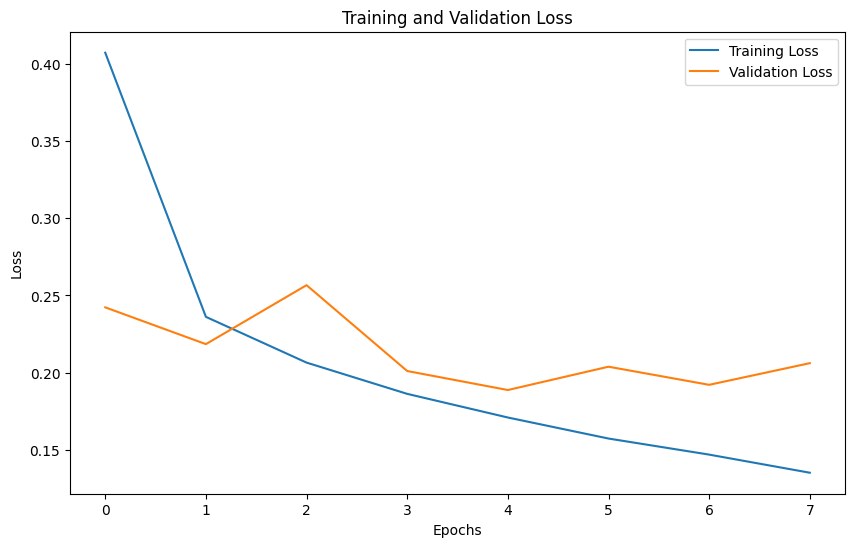

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## **Hurrah 94 Percent Accuracy Achieved!!!!!!!!!**

### *Note In This above exercise different websites is used for solving problems*